### Step 1: Loading the dataset and reading the csv

In [1]:
import pandas as pd
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import numpy as np

In [2]:
df = pd.read_csv('odp_contributionsbygender.csv')

In [3]:
df.head()

,Contribution_ID,ISOCode3,M49_Code,Contributing_Country,Mission_Acronym,Personnel_Type,Female_Personnel,Male_Personnel,Last_Reporting_Date
0,427903,DZA,12.0,Algeria,MONUSCO,Experts on Mission,0,2,31/07/2020
1,427904,ARG,32.0,Argentina,MINURSO,Experts on Mission,0,2,31/07/2020
2,427905,ARG,32.0,Argentina,UNFICYP,Troops,15,219,31/07/2020
3,427906,ARG,32.0,Argentina,UNFICYP,Staff Officer,3,6,31/07/2020
4,427907,ARG,32.0,Argentina,UNMISS,Individual Police,1,5,31/07/2020


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147631 entries, 0 to 147630
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Contribution_ID       147631 non-null  int64  
 1   ISOCode3              147627 non-null  object 
 2   M49_Code              147626 non-null  float64
 3   Contributing_Country  147626 non-null  object 
 4   Mission_Acronym       147631 non-null  object 
 5   Personnel_Type        147631 non-null  object 
 6   Female_Personnel      147631 non-null  int64  
 7   Male_Personnel        147631 non-null  int64  
 8   Last_Reporting_Date   147631 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 10.1+ MB


### Step 2: Removing NA values

In [5]:
df.isnull().any()

Contribution_ID         False
ISOCode3                 True
M49_Code                 True
Contributing_Country     True
Mission_Acronym         False
Personnel_Type          False
Female_Personnel        False
Male_Personnel          False
Last_Reporting_Date     False
dtype: bool

<AxesSubplot:>

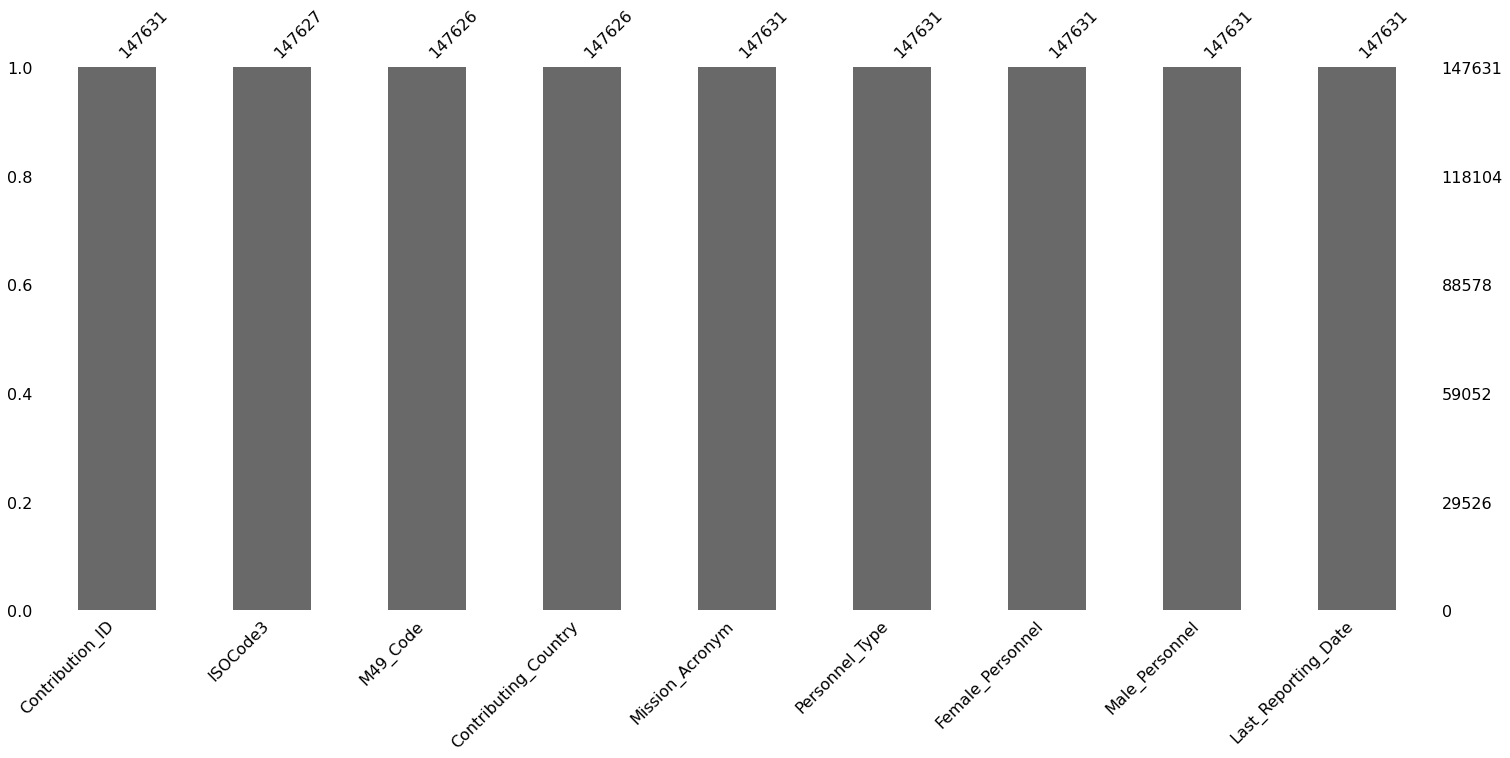

In [6]:
msno.bar(df)

In [7]:
df.isnull().any()

Contribution_ID         False
ISOCode3                 True
M49_Code                 True
Contributing_Country     True
Mission_Acronym         False
Personnel_Type          False
Female_Personnel        False
Male_Personnel          False
Last_Reporting_Date     False
dtype: bool

In [8]:
df=df.dropna()

In [9]:
df.isnull().any()

Contribution_ID         False
ISOCode3                False
M49_Code                False
Contributing_Country    False
Mission_Acronym         False
Personnel_Type          False
Female_Personnel        False
Male_Personnel          False
Last_Reporting_Date     False
dtype: bool

### Step 3: Date object to Datetime fix


In [10]:
df['Date']= pd.to_datetime(df['Last_Reporting_Date'])

In [11]:
df=df.drop(columns=['Last_Reporting_Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147626 entries, 0 to 147630
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Contribution_ID       147626 non-null  int64         
 1   ISOCode3              147626 non-null  object        
 2   M49_Code              147626 non-null  float64       
 3   Contributing_Country  147626 non-null  object        
 4   Mission_Acronym       147626 non-null  object        
 5   Personnel_Type        147626 non-null  object        
 6   Female_Personnel      147626 non-null  int64         
 7   Male_Personnel        147626 non-null  int64         
 8   Date                  147626 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 11.3+ MB


### Step 4: checking the percentage of females in July 2020 in ploice units

In [13]:
start_date = "2020-7-1"
end_date = "2020-7-31" 
after_start_date = df["Date"] >= start_date
before_end_date = df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
july_df = df.loc[between_two_dates]
print(july_df)

     Contribution_ID ISOCode3  M49_Code Contributing_Country Mission_Acronym  \
0             427903      DZA      12.0              Algeria         MONUSCO   
1             427904      ARG      32.0            Argentina         MINURSO   
2             427905      ARG      32.0            Argentina         UNFICYP   
3             427906      ARG      32.0            Argentina         UNFICYP   
4             427907      ARG      32.0            Argentina          UNMISS   
..               ...      ...       ...                  ...             ...   
978           428881      ZWE     716.0             Zimbabwe          UNISFA   
979           428882      ZWE     716.0             Zimbabwe          UNMISS   
980           428883      ZWE     716.0             Zimbabwe          UNMISS   
981           428884      ZWE     716.0             Zimbabwe          UNMISS   
982           428885      ZWE     716.0             Zimbabwe           UNSOM   

         Personnel_Type  Female_Personn

In [14]:
df_groupby_personnel = july_df.groupby('Personnel_Type').sum()

In [15]:
df_groupby_personnel

,Contribution_ID,M49_Code,Female_Personnel,Male_Personnel
Personnel_Type,,,,
Experts on Mission,128517527,134904.0,233,924
Formed Police Units,13278162,15908.0,741,6039
Individual Police,88684018,104453.0,591,1497
Staff Officer,130658856,135550.0,334,1634
Troops,59972739,59628.0,3445,67040


In [16]:
pert_females_in_formed_police_units = 741/(741+6039)*100
print(str(pert_females_in_formed_police_units)+'%')

10.929203539823009%


### In july 2020 10.9 or roughly 11% of the personnels in Formed Police Units were females. This is much less than the expected infograph of 2019.

### Step 5: Graphing the previous step

In [17]:
pivot

NameError: name 'pivot' is not defined

In [18]:
start_date = "2017-1-1"
end_date = "2020-12-31" 
after_start_date = df["Date"] >= start_date
before_end_date = df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df.loc[between_two_dates]
print(filtered_dates)

       Contribution_ID ISOCode3  M49_Code              Contributing_Country  \
0               427903      DZA      12.0                           Algeria   
1               427904      ARG      32.0                         Argentina   
2               427905      ARG      32.0                         Argentina   
3               427906      ARG      32.0                         Argentina   
4               427907      ARG      32.0                         Argentina   
...                ...      ...       ...                               ...   
41334            75629      BOL      68.0  Bolivia (Plurinational State of)   
41335            75630      BIH      70.0            Bosnia and Herzegovina   
41336            75631      BIH      70.0            Bosnia and Herzegovina   
41337            75632      BIH      70.0            Bosnia and Herzegovina   
41338            75633      BIH      70.0            Bosnia and Herzegovina   

      Mission_Acronym      Personnel_Type  Female_P

In [19]:
pv= filtered_dates[filtered_dates.Personnel_Type == 'Formed Police Units'].pivot_table(index=filtered_dates.Date.dt.year, aggfunc='sum')


In [20]:
pv


,Contribution_ID,Female_Personnel,M49_Code,Male_Personnel
Date,,,,
2017,31657281,5294,194404.0,76690
2018,89159639,7103,224764.0,85698
2019,142501774,8944,213358.0,77204
2020,92259109,5161,111356.0,42148


In [21]:
pv['percent'] = pv.Female_Personnel/(pv.Female_Personnel+pv.Male_Personnel)*100

In [22]:
pv

,Contribution_ID,Female_Personnel,M49_Code,Male_Personnel,percent
Date,,,,,
2017,31657281,5294,194404.0,76690,6.457358
2018,89159639,7103,224764.0,85698,7.654012
2019,142501774,8944,213358.0,77204,10.382133
2020,92259109,5161,111356.0,42148,10.909129


In [23]:
pv2 = pd.DataFrame(pv.to_records())

In [24]:
pv2

,Date,Contribution_ID,Female_Personnel,M49_Code,Male_Personnel,percent
0,2017,31657281,5294,194404.0,76690,6.457358
1,2018,89159639,7103,224764.0,85698,7.654012
2,2019,142501774,8944,213358.0,77204,10.382133
3,2020,92259109,5161,111356.0,42148,10.909129


<BarContainer object of 4 artists>

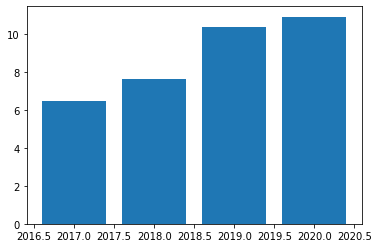

In [25]:
plt.bar(pv2.Date, pv2.percent)

### Step 6: Building a function

In [26]:
df['Mission_Acronym']=df['Mission_Acronym'].str.rstrip()

In [27]:
df.ISOCode3.unique()

array(['DZA', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BGD', 'BLR', 'BEL',
       'BEN', 'BTN', 'BOL', 'BIH', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI',
       'KHM', 'CMR', 'CAN', 'TCD', 'CHL', 'CHN', 'COL', 'COG', 'CIV',
       'HRV', 'CYP', 'CZE', 'DNK', 'DJI', 'DOM', 'ECU', 'EGY', 'SLV',
       'EST', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'DEU', 'GHA',
       'GRC', 'GTM', 'GIN', 'HND', 'HUN', 'IND', 'IDN', 'IRN', 'IRL',
       'ITA', 'JPN', 'JOR', 'KAZ', 'KEN', 'KGZ', 'LVA', 'LBR', 'LTU',
       'LUX', 'MDG', 'MWI', 'MYS', 'MLI', 'MLT', 'MRT', 'MEX', 'MDA',
       'MNG', 'MNE', 'MAR', 'NAM', 'NPL', 'NLD', 'NZL', 'NER', 'NGA',
       'MKD', 'NOR', 'PAK', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'KOR',
       'ROU', 'RUS', 'RWA', 'WSM', 'SEN', 'SRB', 'SLE', 'SVK', 'SVN',
       'ZAF', 'ESP', 'LKA', 'SWE', 'CHE', 'TJK', 'THA', 'TLS', 'TGO',
       'TUN', 'TUR', 'UGA', 'UKR', 'GBR', 'TZA', 'USA', 'URY', 'VNM',
       'ZMB', 'ZWE', 'ALB', 'SWZ', 'CUB', 'GNB', 'COD', 'LBY', 'YEM',
       'QAT', 'CRI',

In [28]:
def fun(x):
   # if x in df.ISOCode3.unique:
        unique_missions = df[df.ISOCode3== x].Mission_Acronym.unique()
        number_of_missions = len(df[df.ISOCode3== x].Mission_Acronym.unique())
        print ('The unique missions the that country sent personnel to are: ', unique_missions)
        print ('The number of uniques missions the that country sent personnel to are: ', number_of_missions)
    #else:
     #   print('ISOCode3 is not in the datanbase')
    

In [29]:
x = 'DZA'
#y = str(x)
unique_missions = df[df.ISOCode3== x].Mission_Acronym.unique()
number_of_missions = len(df[df.ISOCode3== x].Mission_Acronym.unique())
print(unique_missions)
print(number_of_missions)

['MONUSCO' 'MONUC' 'ONUB' 'UNMEE']
4


In [30]:
fun('IND')

The unique missions the that country sent personnel to are:  ['MINURSO' 'MONUSCO' 'UNDOF' 'UNFICYP' 'UNIFIL' 'UNISFA' 'UNMISS' 'UNTSO'
 'UNSOM' 'MINUJUSTH' 'MINUSTAH' 'UNMIL' 'UNAMA' 'UNOCI' 'UNAMI' 'UNMIT'
 'UNMIS' 'MONUC' 'UNMIK' 'UNIOSIL' 'UNMEE' 'ONUB' 'UNOMIG' 'UNAMSIL'
 'UNIKOM' 'UNMIBH']
The number of uniques missions the that country sent personnel to are:  26


### Step 7: Statistical questions in the last cell

In [31]:
minusma = df[df.Mission_Acronym == 'MINUSMA']

In [32]:
minusma['total'] = minusma.Female_Personnel+minusma.Male_Personnel

<ipython-input-32-2349beaa011c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minusma['total'] = minusma.Female_Personnel+minusma.Male_Personnel


In [33]:
minusma = minusma.groupby('Date').sum()

In [34]:
minusma

,Contribution_ID,M49_Code,Female_Personnel,Male_Personnel,total
Date,,,,,
2013-07-31,1632093,20886.0,57,6237,6294
2013-08-31,1782510,20878.0,36,5974,6010
2013-09-30,1630384,20268.0,31,5974,6005
2013-10-31,1944083,23676.0,40,5832,5872
2013-11-30,2229969,26230.0,63,6284,6347
...,...,...,...,...,...
2020-03-31,61525844,62574.0,703,13316,14019
2020-04-30,61673751,62292.0,698,13286,13984
2020-05-31,61820238,62292.0,681,13212,13893


In [35]:
minusma.describe()

,Contribution_ID,M49_Code,Female_Personnel,Male_Personnel,total
count,8.200000e+01,82.000000,82.000000,82.000000,82.000000
mean,1.959537e+07,45560.902439,353.939024,11414.914634,11768.853659
std,2.138854e+07,13404.660207,206.522312,2336.334404,2517.833922
min,1.630384e+06,20268.000000,31.000000,5832.000000,5872.000000
25%,3.996181e+06,33526.500000,197.500000,9918.750000,10125.250000
50%,7.321261e+06,42179.000000,299.000000,11764.500000,12039.500000
75%,4.048611e+07,59964.500000,555.750000,13221.000000,13882.000000
max,6.239307e+07,62912.000000,706.000000,14283.000000,14871.000000


In [36]:
minusma[minusma.total == 5872]

,Contribution_ID,M49_Code,Female_Personnel,Male_Personnel,total
Date,,,,,
2013-10-31,1944083,23676.0,40,5832,5872


In [37]:
minusma[minusma.total == 14871]

,Contribution_ID,M49_Code,Female_Personnel,Male_Personnel,total
Date,,,,,
2019-03-31,40932643,60031.0,588,14283,14871


In [38]:
minusma.total.median()

12039.5

(a) Across time, how much total personnel was stationed there on average? - 11768.853659
(a) What was the median? 12039.5
(b) The 25th and 75th quartile? 10125.250000 , 13882.000000
(c) When was the lowest point and how many troops were stationed there then? 5872, 2013-10-31
(d) When was the highest and how many? 14871, 2019-03-31
